In [378]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from linear_regression import LinearRegression

np.random.seed(0)

# Create a dataset of features (1D) and labels.
x = [float(i)/100 for i in range(-100, 100)]
y = [j**3 + 1*np.random.rand(1)[0] for j in x]

# Split them into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [379]:
# Set up linear regression on the training set
lr = LinearRegression(X_train, y_train, degree=3)

# Run gradient descent to retrieve params and cost
params, cost = lr.gradient_descent(0.2, 0, num_iterations=200)

After 100 iterations: 0.0397749593875
After 200 iterations: 0.0388606008216


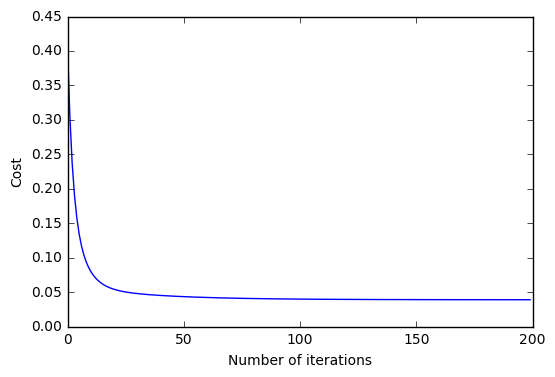

In [380]:
# Check the residual curves
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.plot(lr.residuals)
plt.show()

In [381]:
# Evaluate the cost function
X_test = lr.instantiate_data(X_test, 3)
lr.cost(X_test, np.matrix(y_test).T, params)

0.038383675361241598

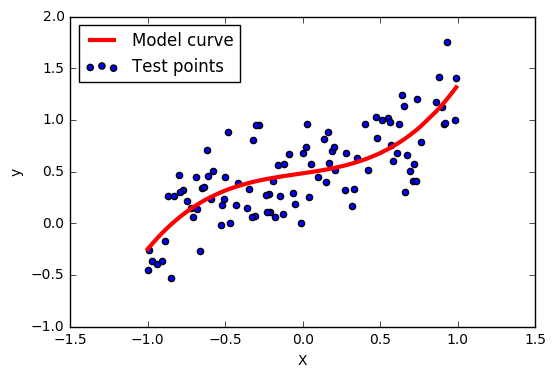

In [382]:
def plot_graph(x, y, params, degree):
    terms = []
    for i in range(1, degree + 1):
        term = params[i] * [xs**i for xs in sorted(x)]
        terms.append(term)
    
    plt.scatter(x, y, label="Test points")
    plt.plot(sorted(x), params[0] + [sum(x) for x in zip(*terms)], color='r', linewidth=3, label="Model curve")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend(loc=2)
    
plot_graph(X_train, y_train, params, degree=3)
plt.show()